# Plot the Saudi Figure - Data Distribution

## - Input the table file

## - Data distribution on time period

## - Using Numpy

/Users/ryota/anaconda/lib/python3.6/site-packages/pandas/core/internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)
/Users/ryota/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
/Users/ryota/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
/Users/ryota/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
/Users/ryota/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an 

<IPython.core.display.Javascript object>


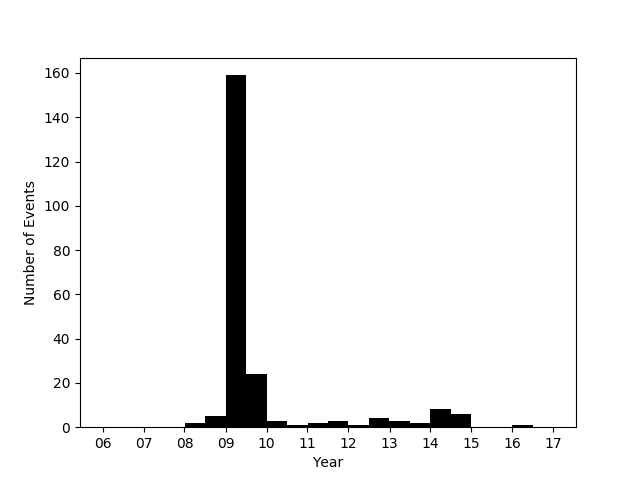

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
import numpy as np
import matplotlib.cm as cm
import pandas as pd
import matplotlib.colors as mcol
import os
import matplotlib.dates as mdates

# Plotting histogram using numpy
###############----For input----###############
evdata = pd.read_csv('data/Ranef_ev.csv')
evdata["EventID"] = evdata["EventID"].astype("datetime64")
evdate = np.array(evdata["EventID"])
evlon = np.array(evdata['Evlon'])
evlat = np.array(evdata['Evlat'])
evDepth = np.array(evdata['Depth'])
evMag = np.array(evdata['Mag'])
#evRanef_PGA = np.array(evdata['Ranef_PGA'])
#evRanef_PGV = np.array(evdata['Ranef_PGV'])

# Convert datetime64 to Timestamp
ts = (evdate - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')

# convert the epoch format to matplotlib date format
mpl_ts = mdates.epoch2num(ts)

# Set the bins for histogram
bin_ts = np.zeros(3)
bin_ts[0] = (np.datetime64('2006-01-01T00:00:00Z') - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
bin_ts[1] = (np.datetime64('2017-01-01T00:00:00Z') - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
bin_ts[2] = (np.datetime64('2017-01-01T00:00:00Z') - np.datetime64('2016-01-01T00:00:00Z')) / np.timedelta64(1, 's')
bin_ts = mdates.epoch2num(bin_ts)
bin_ts[2] = (365*3 + 366)/8    # half year
bins = np.arange(bin_ts[0], bin_ts[1], bin_ts[2])

# plot it
fig, ax = plt.subplots(1,1)
ax.hist(mpl_ts, bins=bins, color='black')

locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
ax.set_xlabel('Year')
ax.set_ylabel('Number of Events')

plt.show()



## - Using Pandas

/Users/ryota/anaconda/lib/python3.6/site-packages/pandas/core/internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


<IPython.core.display.Javascript object>


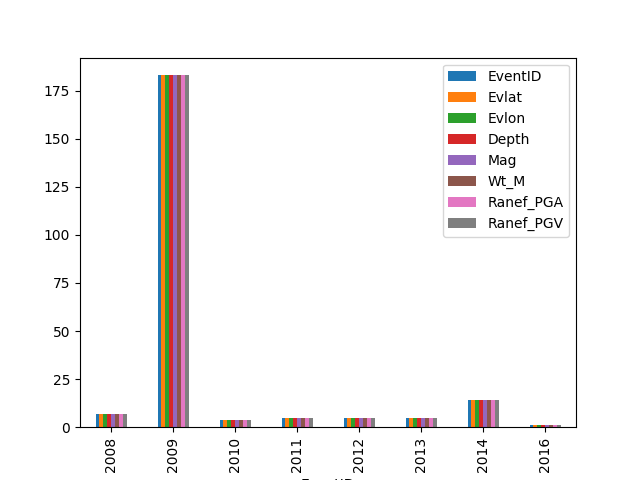

In [5]:
# Plotting histogram using pandas

###############----For input----###############
#evdata = pd.read_csv('Ranef_ev.csv', index_col = 0, parse_dates=['EventID'])
evdata = pd.read_csv('data/Ranef_ev.csv')
evdata["EventID"] = evdata["EventID"].astype("datetime64")
#evdate = np.array(evdata["EventID"])
#evdate = evdate[:,0]
evlon = np.array(evdata['Evlon'])
evlat = np.array(evdata['Evlat'])
evDepth = np.array(evdata['Depth'])
evMag = np.array(evdata['Mag'])

evdata.groupby(evdata["EventID"].dt.year).count().plot(kind='bar')
#evdata.groupby(evdata["EventID"].dt.year).count().plot()    # Normal Plot
plt.show()


